In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
df = pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# TASK1

In [4]:
tz=pd.pivot_table(data=df[['left','salary']],index=df['salary'],columns='left',aggfunc='count')
tz

salary      
left        0     1
salary             
high     1155    82
low      5144  2172
medium   5129  1317

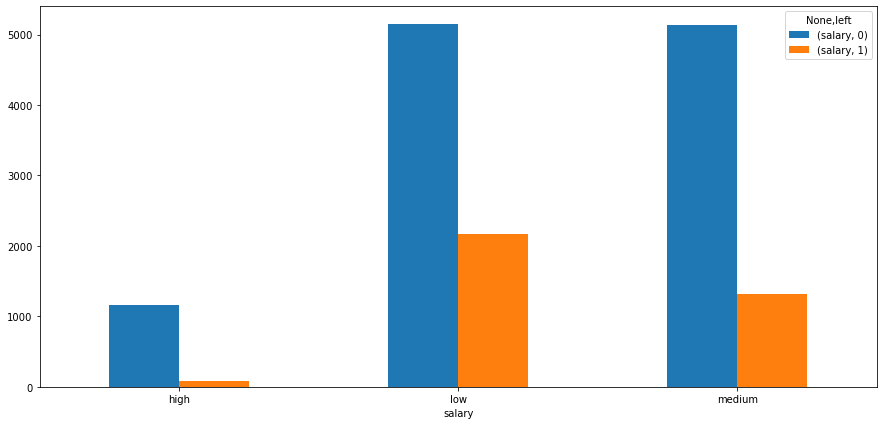

In [5]:
tz.plot.bar(rot=0,figsize=(15, 7));

In [6]:
tz=pd.pivot_table(data=df[['left','Department']],index=df['Department'],columns='left',aggfunc='count')
tz

Department      
left                 0     1
Department                  
IT                 954   273
RandD              666   121
accounting         563   204
hr                 524   215
management         539    91
marketing          655   203
product_mng        704   198
sales             3126  1014
support           1674   555
technical         2023   697

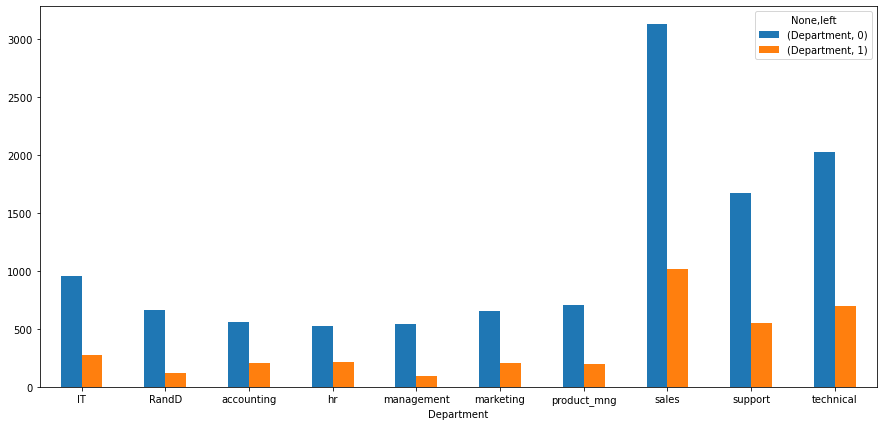

In [7]:

tz.plot.bar(rot=0,figsize=(15, 7));


# TASK2

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### There is no null value

#### checking for relation

In [10]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### from above both methods i can see (average_montly_hours,satisfaction_level,Work_accident,promotion_last_5years,promotion_last_5years) shows relation with respect to retension

## Convert Salary and department into numeric

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
df['Department_Encode']= label_encoder.fit_transform(df['Department'])
df['Salary_Encode']= label_encoder.fit_transform(df['salary'])


In [14]:
df=df.drop(['Department','salary'],axis=1)

In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_Encode,Salary_Encode
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# TASK3

In [16]:
X=df.drop(['left','last_evaluation','promotion_last_5years'],axis=1)

In [17]:
y=df.left

In [18]:
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

In [19]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\yogesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
# Accuracy of train data
model.score(X_train, y_train)

0.7646143587463881

In [22]:
# Accuracy of test data
model.score(X_test, y_test)

0.7674285714285715

In [23]:
model.coef_

array([[-3.99535955e+00, -2.40358742e-01,  6.26343272e-03,
         2.25308994e-01, -1.04308151e+00,  3.94888991e-02,
         3.36039302e-03]])

In [24]:
X.columns

Index(['satisfaction_level', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'Department_Encode',
       'Salary_Encode'],
      dtype='object')

In [25]:
Coef=pd.Series(model.coef_[0], index=X.columns)

In [33]:
Coef.sort_values(ascending=True)

satisfaction_level     -3.995360
Work_accident          -1.043082
number_project         -0.240359
Salary_Encode           0.003360
average_montly_hours    0.006263
Department_Encode       0.039489
time_spend_company      0.225309
dtype: float64

In [ ]:
#from the above calculation of coefficient we can see satisfaction_level most important factor affecting  

# TASK4

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[7439  600]
 [1842  619]]


In [28]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)

7439 600 1842 619


In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))


Accuracy: 0.7674285714285715
Recall: 0.25152377082486793
f1-score: 0.3364130434782609
Precision: 0.5077932731747334


In [30]:
from sklearn.metrics import roc_auc_score
#roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
#roc #
#help(roc_auc_score)

In [31]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.588


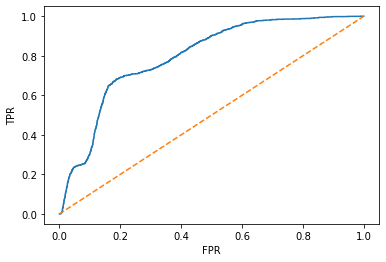

In [32]:
from sklearn.metrics import roc_curve
positive_prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, positive_prob)
plt.plot(fpr,tpr,label="Logistic Regression")
plt.plot([0,1],[0,1],linestyle='--',label="No skill")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()